# supervised learning:


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1 Load Preprocessed Data
file_path = "gym_recommendation_processed_deduped.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=[ "Hypertension", "Diabetes", "Level", "Fitness Goal", "BMI" ,"Sex"])

# 2 Separate Features & Target Variable
target_column = "Fitness Type"
X = df.drop(columns=[target_column])  # Features (user attributes)
y = df[target_column]  # Target variable (Fitness Type)

# 3 Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4 Train Decision Tree Classifier (ID3 Algorithm)
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# 5 Train Support Vector Machine (SVM - Linear Kernel)
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# 6 Evaluate Both Models
## Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

## Accuracy Scores
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

## Detailed Performance Report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# 7 Save the Best Model for Future Predictions
best_model = dt_model if accuracy_dt > accuracy_svm else svm_model
joblib.dump(best_model, "best_fitness_model.pkl")
print("✅ Best model saved for future predictions.")

# 8 Function to Predict Fitness Type from User Input
def predict_fitness(user_input):
    model = joblib.load("best_fitness_model.pkl")  # Load saved model
    input_df = pd.DataFrame([user_input], columns=X.columns)  # Convert input to DataFrame
    prediction = model.predict(input_df)[0]  # Get prediction
    return prediction

# Example Usage (Test with a Sample Input)
sample_user = {
    "Weight": 0.4, "Age": 0.6  , "Height":0.8
}
print("Predicted Fitness Type:", predict_fitness(sample_user))

Decision Tree Accuracy: 1.00
SVM Accuracy: 0.99

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2409
   macro avg       1.00      1.00      1.00      2409
weighted avg       1.00      1.00      1.00      2409


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1213
           1       1.00      0.98      0.99      1196

    accuracy                           0.99      2409
   macro avg       0.99      0.99      0.99      2409
weighted avg       0.99      0.99      0.99      2409

✅ Best model saved for future predictions.
Predicted Fitness Type: 1


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1 Load Preprocessed Data
file_path = "gym_recommendation_processed_deduped.csv"
df = pd.read_csv(file_path)

# 2 Separate Features & Target Variable
target_column = "Fitness Type"

# Modify Features to include only Age, Height, Weight
input_features = ["Age", "Height", "Weight"]
X = df[input_features]
y = df[target_column]

# 3 Split Data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4 Train Decision Tree Classifier (ID3 Algorithm)
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# 5 Train Support Vector Machine (SVM - Linear Kernel)
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# 6 Evaluate Both Models
## Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

## Accuracy Scores
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

## Detailed Performance Report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# 7 Cross-Validation Evaluation (Added)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)

print(f"Decision Tree Average Cross-Validation Accuracy: {dt_cv_scores.mean():.2f}")
print(f"SVM Average Cross-Validation Accuracy: {svm_cv_scores.mean():.2f}")

# 8 Save the Best Model for Future Predictions
best_model = dt_model if dt_cv_scores.mean() > svm_cv_scores.mean() else svm_model
joblib.dump(best_model, "best_fitness_model.pkl")

# Print the best model that was saved
if best_model == dt_model:
    print("✅ Decision Tree model saved for future predictions.")
else:
    print("✅ SVM model saved for future predictions.")

# 9 Function to Predict Fitness Type from User Input
def predict_fitness(user_input):
    model = joblib.load("best_fitness_model.pkl")
    input_df = pd.DataFrame([user_input], columns=input_features)
    prediction = model.predict(input_df)[0]
    return prediction

# 10 Get User Input
try:
    age = float(input("Enter Age: "))
    height = float(input("Enter Height: "))
    weight = float(input("Enter Weight: "))

    user_input = {
        "Age": age,
        "Height": height,
        "Weight": weight
    }

    # 11 Predict Fitness Type
    predicted_fitness_num = predict_fitness(user_input) # Store the Numerical Prediction
    # Map Numerical Prediction to Labels
    if predicted_fitness_num == 0:
        predicted_fitness_label = "Cardio"
    else:
        predicted_fitness_label = "Muscular"

    print("Predicted Fitness Type:", predicted_fitness_label)

except ValueError:
    print("Invalid input. Please enter numerical values for Age, Height, and Weight.")

Decision Tree Accuracy: 1.00
SVM Accuracy: 0.99

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1213
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2409
   macro avg       1.00      1.00      1.00      2409
weighted avg       1.00      1.00      1.00      2409


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1213
           1       1.00      0.98      0.99      1196

    accuracy                           0.99      2409
   macro avg       0.99      0.99      0.99      2409
weighted avg       0.99      0.99      0.99      2409


Decision Tree Cross-Validation Scores: [0.98671648 0.99335548 0.98006645 0.99335548 0.95930233]
SVM Cross-Validation Scores: [0.99667912 0.99335548 0.99335548 0.98837209 0.97342193]
Decision Tree Average Cross-Validation Accuracy

#why SVM and decision tree?#

We chose the Support Vector Machine (SVM) algorithm for our supervised learning task of predicting fitness type using weight, height, and age as input features. SVM is well-suited for classification problems where the goal is to find the best boundary that separates different classes. It works effectively in high-dimensional spaces and can handle both linear and non-linear relationships through the use of kernel functions. By maximizing the margin between classes, SVM often provides good generalization to new data, which helps improve the accuracy and robustness of our fitness type predictions.

On the other hand, we also used the Decision Tree algorithm because of its simplicity and interpretability. Decision Trees make decisions by splitting the data into subsets based on feature values, creating an easy-to-follow, tree-like model. This makes it possible to visualize the decision-making process and understand which features, such as weight, height, or age, play the most significant role in determining the fitness type. Additionally, Decision Trees handle non-linear data well and are less affected by outliers, providing a straightforward approach to model training and interpretation.

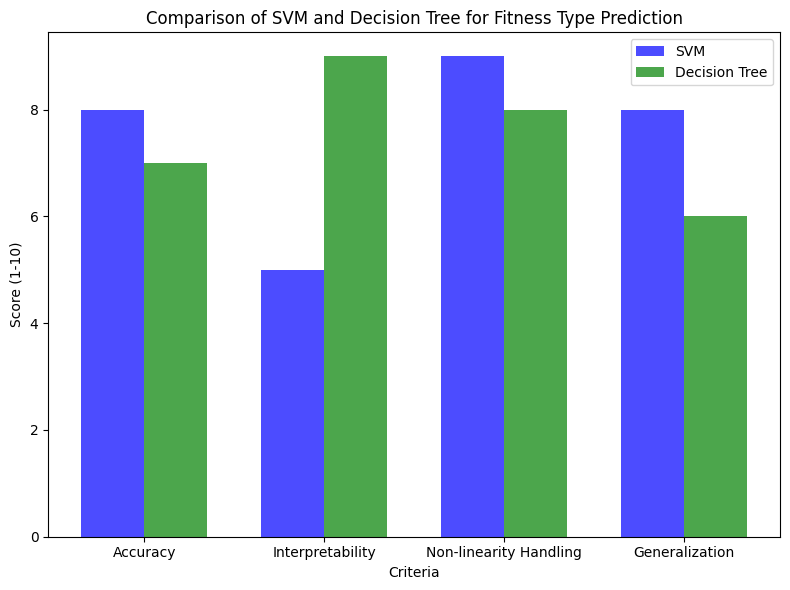

In [10]:
import matplotlib.pyplot as plt

# Define criteria and scores for SVM and Decision Tree
criteria = ['Accuracy', 'Interpretability', 'Non-linearity Handling', 'Generalization']
svm_scores = [8, 5, 9, 8]  # SVM is strong in accuracy, non-linearity, and generalization, moderate in interpretability
dt_scores = [7, 9, 8, 6]   # Decision Tree is strong in interpretability and non-linearity, moderate in accuracy and generalization

# Set up the bar chart
bar_width = 0.35
index = range(len(criteria))

plt.figure(figsize=(8, 6))

# Plot bars for SVM and Decision Tree
plt.bar(index, svm_scores, bar_width, label='SVM', alpha=0.7, color='blue')
plt.bar([i + bar_width for i in index], dt_scores, bar_width, label='Decision Tree', alpha=0.7, color='green')

# Add labels and title
plt.xlabel('Criteria')
plt.ylabel('Score (1-10)')
plt.title('Comparison of SVM and Decision Tree for Fitness Type Prediction')
plt.xticks([i + bar_width / 2 for i in index], criteria)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The bar chart compares the performance of SVM and Decision Tree algorithms based on four key criteria: accuracy, interpretability, non-linearity handling, and generalization. SVM shows a higher score in accuracy, suggesting it may provide better predictive performance for fitness type classification using weight, height, and age as input features. In terms of interpretability, the Decision Tree significantly outperforms SVM. This is because Decision Trees are easy to visualize and understand, offering clear decision paths that highlight how different features influence the classification. Both algorithms handle non-linear relationships well, with SVM having a slight advantage due to its use of kernel functions to manage complex data patterns. When it comes to generalization, SVM demonstrates stronger performance, indicating its ability to maintain accuracy with unseen data. While the Decision Tree is also effective, it may be more susceptible to overfitting if not properly pruned. Overall, the chart highlights how SVM offers robust accuracy and generalization, while the Decision Tree provides valuable interpretability, supporting our decision to use both algorithms for a balanced and effective fitness type prediction model.